# Part 2

***Exercise 2.1***

**Ans.**

1.Response bias:
    Happens in content generated by humans. Most data comes from a few sources, a limited population, and a few demographic groups or geographic areas.

2.Bias due to feedback loops:
    Occus whan a model itselfs influences the generation of data that is used to train it.
    
3.Bias due to system drift:
    Happens in when the system generating the data goes through changes over time.
    
4.Omitted variable bias:
    Occurs in data in which critical attributes that influence the outcome are missing. Data generated by humans does not record certain information due to lack of access or privacy, and it will omit variables is correlated with the target.

5.Socieltal Bias:
    Happen in content produced by humans, whether it be social media content or curated news articles. Data inherently contains bias and stereotypes—for instance, races and gender.


**Potential Bias Source**

In [246]:
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools 

from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score

from bokeh.models import ColumnDataSource, HoverTool
from bokeh.io import output_notebook
from bokeh.plotting import figure, show
from bokeh.models import Legend
from bokeh.models import ColumnDataSource, HoverTool

In [8]:
df = pd.read_csv("DataAssignment2.txt")

In [9]:
df

,id,compas_screening_date,sex,age,age_cat,race,juv_fel_count,decile_score,juv_misd_count,juv_other_count,...,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event,two_year_recid
0,1,2013-08-14,Male,69,Greater than 45,Other,0,1,0,0,...,1,Low,2013-08-14,2014-07-07,2014-07-14,0,0,327,0,0
1,3,2013-01-27,Male,34,25 - 45,African-American,0,3,0,0,...,1,Low,2013-01-27,2013-01-26,2013-02-05,0,9,159,1,1
2,4,2013-04-14,Male,24,Less than 25,African-American,0,4,0,1,...,3,Low,2013-04-14,2013-06-16,2013-06-16,4,0,63,0,1
3,5,2013-01-13,Male,23,Less than 25,African-American,0,8,1,0,...,6,Medium,2013-01-13,NaN,NaN,1,0,1174,0,0
4,6,2013-03-26,Male,43,25 - 45,Other,0,1,0,0,...,1,Low,2013-03-26,NaN,NaN,2,0,1102,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7209,10996,2013-11-23,Male,23,Less than 25,African-American,0,7,0,0,...,5,Medium,2013-11-23,2013-11-22,2013-11-24,0,1,860,0,0
7210,10997,2014-02-01,Male,23,Less than 25,African-American,0,3,0,0,...,5,Medium,2014-02-01,2014-01-31,2014-02-02,0,1,790,0,0
7211,10999,2014-01-14,Male,57,Greater than 45,Other,0,1,0,0,...,1,Low,2014-01-14,2014-01-13,2014-01-14,0,0,808,0,0
7212,11000,2014-03-09,Female,33,25 - 45,African-American,0,2,0,0,...,2,Low,2014-03-09,2014-03-08,2014-03-09,3,0,754,0,0


In [11]:
# turn into a binary classification problem
# create feature is_med_or_high_risk
df['is_med_or_high_risk']  = (df['decile_score']>=5).astype(int)
df.head()

,id,compas_screening_date,sex,age,age_cat,race,juv_fel_count,decile_score,juv_misd_count,juv_other_count,...,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event,two_year_recid,is_med_or_high_risk
0,1,2013-08-14,Male,69,Greater than 45,Other,0,1,0,0,...,Low,2013-08-14,2014-07-07,2014-07-14,0,0,327,0,0,0
1,3,2013-01-27,Male,34,25 - 45,African-American,0,3,0,0,...,Low,2013-01-27,2013-01-26,2013-02-05,0,9,159,1,1,0
2,4,2013-04-14,Male,24,Less than 25,African-American,0,4,0,1,...,Low,2013-04-14,2013-06-16,2013-06-16,4,0,63,0,1,0
3,5,2013-01-13,Male,23,Less than 25,African-American,0,8,1,0,...,Medium,2013-01-13,NaN,NaN,1,0,1174,0,0,1
4,6,2013-03-26,Male,43,25 - 45,Other,0,1,0,0,...,Low,2013-03-26,NaN,NaN,2,0,1102,0,0,0


In [12]:
# classification accuracy
np.mean(df['is_med_or_high_risk']==df['two_year_recid'])
np.mean(df['two_year_recid'])

0.6537288605489326

0.45065151095092876

(2, 0)

True negatives:   2681
False positives:  1282
False negatives:  1216
True positives:   2035


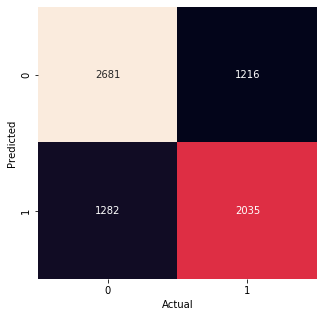

In [37]:
cm = pd.crosstab(df['is_med_or_high_risk'], df['two_year_recid'], 
                               rownames=['Predicted'], colnames=['Actual'])
p = plt.figure(figsize=(5,5))
p = sns.heatmap(cm, annot=True, fmt="d", cbar=False)

p.set_ylim(2, 0)

[[tn , fp],[fn , tp]]  = confusion_matrix(df['two_year_recid'], df['is_med_or_high_risk'])
print("True negatives:  ", tn)
print("False positives: ", fp)
print("False negatives: ", fn)
print("True positives:  ", tp)

(2, 0)

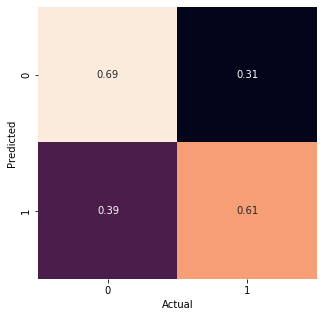

In [39]:
#normalize by rows
cm = pd.crosstab(df['is_med_or_high_risk'], df['two_year_recid'], 
                               rownames=['Predicted'], colnames=['Actual'], normalize='index')
p = plt.figure(figsize=(5,5))
p = sns.heatmap(cm, annot=True, fmt=".2f", cbar=False)

p.set_ylim(2, 0)

(2, 0)

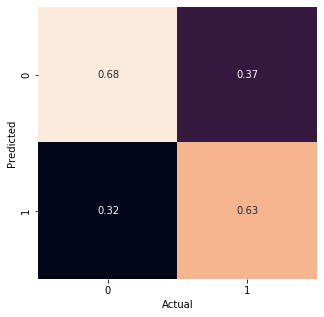

In [42]:
#normalize by columns
cm = pd.crosstab(df['is_med_or_high_risk'], df['two_year_recid'], 
                               rownames=['Predicted'], colnames=['Actual'], normalize='columns')
p = plt.figure(figsize=(5,5));
p = sns.heatmap(cm, annot=True, fmt=".2f", cbar=False)

p.set_ylim(2, 0)

In [43]:
fpr = fp/(fp+tn)
fnr  = fn/(fn+tp)

print("False positive rate (overall): ", fpr)
print("False negative rate (overall): ", fnr)

False positive rate (overall):  0.32349230381024474
False negative rate (overall):  0.3740387573054445


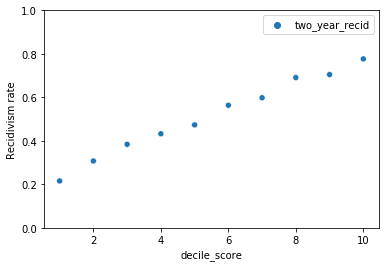

In [133]:
d = df.groupby('decile_score').agg({'two_year_recid': 'mean'})
# plot
sns.scatterplot(data=d);
plt.ylim(0,1);
plt.ylabel('Recidivism rate');

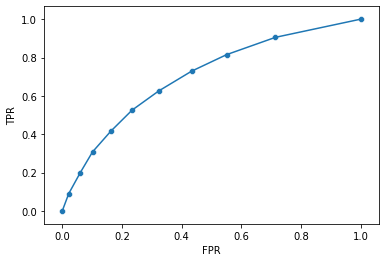

In [47]:
fpr, tpr, thresholds = roc_curve(df['two_year_recid'], df['decile_score'])
sns.scatterplot(x=fpr, y=tpr, );
sns.lineplot(x=fpr, y=tpr);
plt.ylabel("TPR");
plt.xlabel("FPR");


In [48]:
auc = roc_auc_score(df['two_year_recid'], df['decile_score'])
auc

0.7021662544019724

# Fairness

In [49]:
df['race'].value_counts()

African-American    3696
Caucasian           2454
Hispanic             637
Other                377
Asian                 32
Native American       18
Name: race, dtype: int64

In [50]:
df = df[df.race.isin(["African-American","Caucasian"])]
# compare accuracy
(df['two_year_recid']==df['is_med_or_high_risk']).astype(int).groupby(df['race']).mean()

race
African-American    0.638258
Caucasian           0.669927
dtype: float64

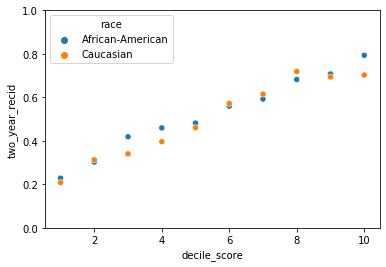

In [51]:
# calibration plot
d = pd.DataFrame(df.groupby(['decile_score','race']).agg({'two_year_recid': 'mean'}))
d = d.reset_index()
im = sns.scatterplot(data=d, x='decile_score', y='two_year_recid', hue='race');
im.set(ylim=(0,1));

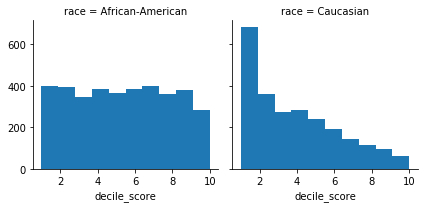

In [52]:
# frequency plot
g = sns.FacetGrid(df, col="race", margin_titles=True);
g.map(plt.hist, "decile_score", bins=10);

In [53]:
# base rates
df.groupby('race').agg({'two_year_recid': 'mean',  
                        'is_med_or_high_risk': 'mean', 
                        'decile_score': 'mean'})

,two_year_recid,is_med_or_high_risk,decile_score
race,,,
African-American,0.514340,0.588203,5.368777
Caucasian,0.393643,0.348003,3.735126


In [54]:
# adjust for Black defendants
black_threshold  = 6
df_black = df[df['race']=="African-American"].copy()
df_black['is_med_or_high_risk'] = (df_black['decile_score']>=black_threshold).astype(int)
[[tn , fp],[fn , tp]]  = confusion_matrix(df_black['two_year_recid'], df_black['is_med_or_high_risk'])
print("False positive rate (Black)      : ", fp/(fp+tn))
print("False negative rate (Black)      : ", fn/(fn+tp))
print("Positive predictive value (Black): ", tp/(tp+fp))
print("Negative predictive value (Black): ", tn/(tn+fn))

False positive rate (Black)      :  0.34317548746518106
False negative rate (Black)      :  0.37243556023145713
Positive predictive value (Black):  0.6594803758982863
Negative predictive value (Black):  0.6248012718600954


In [55]:
# adjust for white defendants
white_threshold  = 4
df_white = df[df['race']=="Caucasian"].copy()
df_white['is_med_or_high_risk'] = (df_white['decile_score']>=white_threshold).astype(int)
[[tn , fp],[fn , tp]]  = confusion_matrix(df_white['two_year_recid'], df_white['is_med_or_high_risk'])
print("False positive rate (white)      : ", fp/(fp+tn))
print("False negative rate (white)      : ", fn/(fn+tp))
print("Positive predictive value (white): ", tp/(tp+fp))
print("Negative predictive value (white): ", tn/(tn+fn))

False positive rate (white)      :  0.35013440860215056
False negative rate (white)      :  0.36024844720496896
Positive predictive value (white):  0.5425812115891132
Negative predictive value (white):  0.7353612167300381


# ***Exercise 2.2***

**African-Americans**

In [64]:
column_list = ["age", "sex", "race", "juv_fel_count", "juv_misd_count", "juv_other_count",
               "priors_count", "two_year_recid", "days_b_screening_arrest"]

df_new = df.loc[:, column_list]
df_african_american = df_new[df_new['race'] == 'African-American']

df_aa_oneHotEncoding = pd.get_dummies(df_african_american)
df_aa_oneHotEncoding.dropna(axis=1, how='any', inplace=True)
df_aa_oneHotEncoding.drop(columns=['race_African-American'], inplace=True)
df_aa_oneHotEncoding

,age,juv_fel_count,juv_misd_count,juv_other_count,priors_count,two_year_recid,sex_Female,sex_Male
1,34,0,0,0,0,1,0,1
2,24,0,0,1,4,1,0,1
3,23,0,1,0,1,0,0,1
11,23,0,0,0,3,1,0,1
13,41,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...
7207,30,0,0,0,0,1,0,1
7208,20,0,0,0,0,0,0,1
7209,23,0,0,0,0,0,0,1
7210,23,0,0,0,0,0,0,1


In [68]:
# Labels about "African American" that we want to predict
labels = np.array(df_aa_oneHotEncoding['two_year_recid'])

df_aa_oneHotEncoding_x = df_aa_oneHotEncoding.drop('two_year_recid', axis=1)

df_aa_oneHotEncoding_x_list = list(df_aa_oneHotEncoding_x.columns)
df_aa_oneHotEncoding_x = np.array(df_aa_oneHotEncoding_x)

x_train_a, x_test_a, y_train_a, y_test_a = train_test_split(df_aa_oneHotEncoding_x, labels, test_size=0.3, random_state=42)

print('Training Features Shape:', x_train_a.shape)
print('Training Labels Shape:', y_train_a.shape)
print('Testing Features Shape:', x_test_a.shape)
print('Testing Labels Shape:', y_test_a.shape)

Training Features Shape: (2587, 7)
Training Labels Shape: (2587,)
Testing Features Shape: (1109, 7)
Testing Labels Shape: (1109,)


In [253]:
forest = ensemble.RandomForestClassifier(n_estimators = 1000, random_state=42)
forest_fit = forest.fit(x_train_a , y_train_a)
y_test_predicted_a = forest_fit.predict(x_test_a)

accuracy = metrics.accuracy_score(y_test_a, y_test_predicted_a)
print("Accurancy: " + str(accuracy) + "\n")

print("Confusion Metrix: ")
CM_af = confusion_matrix(y_test_a, y_test_predicted_a, normalize='true')
print(CM_af)
print()

print("Classification Report: \n")
print(classification_report(y_test_a, y_test_predicted_a))

Accurancy: 0.6257889990982868

Confusion Metrix: 
[[0.64909091 0.35090909]
 [0.39713775 0.60286225]]

Classification Report: 

              precision    recall  f1-score   support

           0       0.62      0.65      0.63       550
           1       0.64      0.60      0.62       559

    accuracy                           0.63      1109
   macro avg       0.63      0.63      0.63      1109
weighted avg       0.63      0.63      0.63      1109



(0, 2)

(2, 0)

Text(0.5, 15.0, 'Predicted label')

Text(60.0, 0.5, 'True label')

Text(0.5, 1, 'Confusion Matrix for Random Forest Model of African Americans')

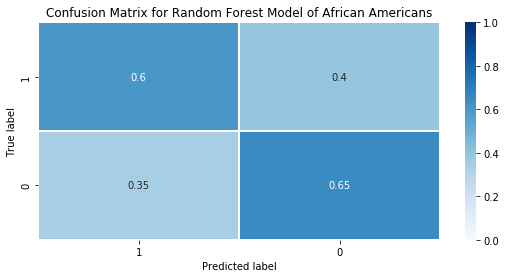

In [255]:
# Get and reshape confusion matrix data
#CM_af = CM_af.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
p = plt.figure(figsize=(9,4))
annot_kws = {"ha": 'center',"va": 'center'}
p = sns.heatmap(CM_af, annot=True, cmap='Blues', linewidths=0.2, vmin=0.0, vmax=1.0)
p.set_ylim(0, 2)
p.set_xlim(2, 0)

# Add labels to the plot
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model of African Americans')
plt.show()

**Caucasian**

In [83]:
df_new = df.loc[:, column_list]
df_caucasian = df_new[df_new['race'] == 'Caucasian']

df_cc_oneHotEncoding = pd.get_dummies(df_caucasian)
df_cc_oneHotEncoding.dropna(axis=1, how='any', inplace=True)
df_cc_oneHotEncoding.drop(columns=['race_Caucasian'], inplace=True)
df_cc_oneHotEncoding

,age,juv_fel_count,juv_misd_count,juv_other_count,priors_count,two_year_recid,sex_Female,sex_Male
6,41,0,0,0,14,1,0,1
8,39,0,0,0,0,0,1,0
9,21,0,0,0,1,1,0,1
10,27,0,0,0,0,0,0,1
12,37,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...
7192,32,0,0,0,0,0,0,1
7194,30,0,0,0,2,1,1,0
7199,23,0,0,0,0,0,0,1
7205,23,0,2,1,5,1,0,1


In [97]:
# Labels about "African American" that we want to predict
labels = np.array(df_cc_oneHotEncoding['two_year_recid'])

df_cc_oneHotEncoding_x = df_cc_oneHotEncoding.drop('two_year_recid', axis=1)

df_cc_oneHotEncoding_x_list = list(df_cc_oneHotEncoding_x.columns)
df_cc_oneHotEncoding_x = np.array(df_cc_oneHotEncoding_x)

x_train_c, x_test_c, y_train_c, y_test_c = train_test_split(df_cc_oneHotEncoding_x, labels, test_size=0.3, random_state=42)

print('Training Features Shape:', x_train_c.shape)
print('Training Labels Shape:', y_train_c.shape)
print('Testing Features Shape:', x_test_c.shape)
print('Testing Labels Shape:', y_test_c.shape)

Training Features Shape: (1717, 7)
Training Labels Shape: (1717,)
Testing Features Shape: (737, 7)
Testing Labels Shape: (737,)


In [249]:
forest_c = ensemble.RandomForestClassifier(n_estimators = 1000, random_state=42)
forest_fit_c = forest_c.fit(x_train_c , y_train_c)
y_test_predicted_c = forest_fit_c.predict(x_test_c)

accuracy = metrics.accuracy_score(y_test_c, y_test_predicted_c)
print("Accurancy: " + str(accuracy) + "\n")

print("Confusion Metrix: ")
CM_cau = confusion_matrix(y_test_c, y_test_predicted_c,normalize='true')
print(CM_cau)
print()

print("Classification Report: \n")
print(classification_report(y_test_c, y_test_predicted_c))

Accurancy: 0.6119402985074627

Confusion Metrix: 
[[0.74364896 0.25635104]
 [0.57565789 0.42434211]]

Classification Report: 

              precision    recall  f1-score   support

           0       0.65      0.74      0.69       433
           1       0.54      0.42      0.47       304

    accuracy                           0.61       737
   macro avg       0.59      0.58      0.58       737
weighted avg       0.60      0.61      0.60       737



(0, 2)

(2, 0)

Text(0.5, 15.0, 'Predicted label')

Text(60.0, 0.5, 'True label')

Text(0.5, 1, 'Confusion Matrix for Random Forest Model of Caucasians')

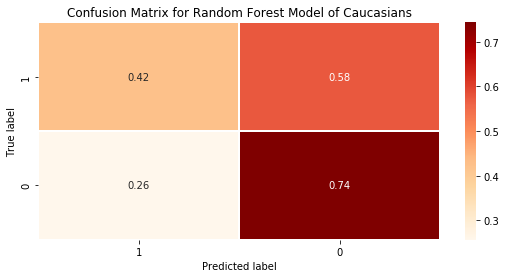

In [256]:
# Get and reshape confusion matrix data
#CM_cau = CM_cau.astype('float') / CM_cau.sum(axis=1)[:, np.newaxis]

# Build the plot
p = plt.figure(figsize=(9,4))
#sns.set(font_scale=2.5)
annot_kws = {"ha": 'center',"va": 'center'}
p = sns.heatmap(CM_cau, annot=True, cmap='OrRd', linewidths=0.2)
p.set_ylim(0, 2)
p.set_xlim(2, 0)

# Add labels to the plot
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model of Caucasians')
plt.show()

In [145]:
y_prob_a = forest_fit.predict_proba(x_test_a)[:, 1]
y_prob_c = forest_fit_c.predict_proba(x_test_c)[:, 1]
ths = np.linspace(1e-5,1-1e-5, 10)

y_prob_a
y_prob_c

array([0.38740053, 0.68883276, 0.96389595, ..., 0.2365881 , 0.92352143,
       0.81433333])

array([6.73569408e-01, 1.66966677e-01, 6.66475355e-01, 7.95520940e-01,
       5.24905952e-01, 5.03313095e-01, 2.62500000e-01, 2.44729121e-01,
       1.32197330e-01, 3.97421789e-01, 5.00000000e-04, 0.00000000e+00,
       6.29000000e-01, 2.62995243e-01, 3.91580894e-01, 4.22442464e-01,
       8.06645022e-03, 3.09314466e-01, 4.86000000e-01, 1.64285714e-03,
       5.55983045e-02, 3.44678571e-02, 1.52375253e-01, 9.10851605e-01,
       3.85755898e-01, 4.12929329e-01, 4.51772189e-01, 5.92576074e-01,
       9.00000000e-03, 2.25118992e-02, 6.32845635e-01, 2.42688095e-01,
       8.52000000e-01, 5.57166667e-01, 1.23641639e-01, 7.06166667e-01,
       2.49472227e-01, 2.44729121e-01, 8.94691270e-01, 7.95520940e-01,
       2.26315140e-01, 7.91716667e-01, 1.38641294e-01, 2.00000000e-03,
       4.96169453e-01, 8.57166667e-01, 9.50000000e-01, 2.49472227e-01,
       3.97421789e-01, 2.42590210e-01, 3.91580894e-01, 4.34731133e-01,
       1.97943254e-01, 7.38124856e-01, 2.04360601e-01, 3.20000000e-02,
      

In [147]:
def func_thr(prob, th):
    prob = (prob>=th).astype(int)
    return prob

def func_TPRFPR(labels, predict):
    fpr, tpr, thresholds = roc_curve(labels, predict)
    return tpr, fpr

#This function takes as an input y, y_probs, thr 
  #and returns the points to plot the ROC curve and their threshold
def roc_curve_ps(y, y_prob, ths):
    #initialize roc as an empty np.array
    roc = np.array([])
    #loop over thresholds
    for th in ths:
        #convert y_prob in y_hat
        y_hat = func_thr(y_prob,th)
        #compute TPR and FPR
        TPR, FPR = func_TPRFPR(y, y_hat)
        #add threshold and point to roc array
        roc = np.append(roc, [th, FPR, TPR])
        #return roc
        
    return roc.reshape(-1, 3)

#This function takes as an input the points from one roc (first group) and the other (second group) and order the points by their distance in ascending order 

roc_aa = roc_curve_ps(y_test_a, y_prob_a, ths)
roc_ca = roc_curve_ps(y_test_c, y_prob_c, ths)

C:\Users\Jennifer\AppData\Roaming\Python\Python37\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)
C:\Users\Jennifer\AppData\Roaming\Python\Python37\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)
C:\Users\Jennifer\AppData\Roaming\Python\Python37\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequ

array([[1e-05, array([0.        , 0.99090909, 1.        ]),
        array([0.        , 0.99463327, 1.        ])],
       [0.11111888888888889, array([0.        , 0.85090909, 1.        ]),
        array([0.        , 0.93023256, 1.        ])],
       [0.2222277777777778, array([0.        , 0.72363636, 1.        ]),
        array([0.       , 0.8783542, 1.       ])],
       [0.33333666666666667, array([0.        , 0.60545455, 1.        ]),
        array([0.        , 0.80322004, 1.        ])],
       [0.4444455555555556, array([0.        , 0.46545455, 1.        ]),
        array([0.        , 0.69051878, 1.        ])],
       [0.5555544444444445, array([0.        , 0.29636364, 1.        ]),
        array([0.        , 0.55277281, 1.        ])],
       [0.6666633333333333, array([0.        , 0.21454545, 1.        ]),
        array([0.        , 0.44543828, 1.        ])],
       [0.7777722222222222, array([0.        , 0.14181818, 1.        ]),
        array([0.       , 0.3470483, 1.       ])],
 

array([[1e-05, array([0.        , 0.97690531, 1.        ]),
        array([0.        , 0.98026316, 1.        ])],
       [0.11111888888888889, array([0.        , 0.76212471, 1.        ]),
        array([0.        , 0.80592105, 1.        ])],
       [0.2222277777777778, array([0.        , 0.63741339, 1.        ]),
        array([0.        , 0.72039474, 1.        ])],
       [0.33333666666666667, array([0.       , 0.4595843, 1.       ]),
        array([0.        , 0.59539474, 1.        ])],
       [0.4444455555555556, array([0.        , 0.33256351, 1.        ]),
        array([0.        , 0.48684211, 1.        ])],
       [0.5555544444444445, array([0.        , 0.23094688, 1.        ]),
        array([0.        , 0.38157895, 1.        ])],
       [0.6666633333333333, array([0.        , 0.15935335, 1.        ]),
        array([0.        , 0.28618421, 1.        ])],
       [0.7777722222222222, array([0.        , 0.09930716, 1.        ]),
        array([0.        , 0.20065789, 1.        ])]

In [240]:
def column(matrix, i):
    return [row[i] for row in matrix]

roc_aa_fpr = roc_aa[:, 1]
roc_aa_fpr = column(roc_aa_fpr, 1)

roc_aa_tpr = roc_aa[:, 2]
roc_aa_tpr = column(roc_aa_tpr, 1)

roc_ca_fpr = roc_ca[:, 1]
roc_ca_fpr = column(roc_ca_fpr, 1)

roc_ca_tpr = roc_ca[:, 2]
roc_ca_tpr = column(roc_ca_tpr, 1)

data_combine = {'FPR_AA': roc_aa_fpr, 'TPR_AA': roc_aa_tpr, 'FPR_CA': roc_ca_fpr, 'TPR_CA': roc_ca_tpr}
df_roc = pd.DataFrame(data_combine)
df_roc

,FPR_AA,TPR_AA,FPR_CA,TPR_CA
0,0.990909,0.994633,0.976905,0.980263
1,0.850909,0.930233,0.762125,0.805921
2,0.723636,0.878354,0.637413,0.720395
3,0.605455,0.803220,0.459584,0.595395
4,0.465455,0.690519,0.332564,0.486842
5,0.296364,0.552773,0.230947,0.381579
6,0.214545,0.445438,0.159353,0.286184
7,0.141818,0.347048,0.099307,0.200658
8,0.094545,0.252236,0.053118,0.092105
9,0.000000,0.003578,1.000000,1.000000


In [241]:
source_df = ColumnDataSource(data=df_roc)
output_notebook()

Loading BokehJS ...

In [248]:
# create a new plot with a title and axis labels
p = figure(title="ROC Line", x_axis_label='FPR', y_axis_label='TPR', toolbar_location="below")

# add a line renderer with legend and line thickness to the plot
p.line(x='FPR_AA', y='TPR_AA', source= source_df, legend="African-American", color="blue", line_width=2)
p.line(x='FPR_CA', y='TPR_CA', source= source_df, legend="Caucasian", color="orange", line_width=2)

show(p)

GlyphRenderer(id='4147', ...)

GlyphRenderer(id='4162', ...)

In [243]:
roc_fpr = roc_aa_fpr + roc_ca_fpr
roc_tpr = roc_aa_tpr + roc_ca_tpr
thres = np.append(roc_aa[:, 0], roc_ca[:, 0])  

data_combine_2 = {'FPR': roc_fpr, 'TPR': roc_tpr, 'TH': thres}
df_roc_all = pd.DataFrame(data_combine_2)
df_roc_all

,FPR,TPR,TH
0,0.990909,0.994633,1e-05
1,0.850909,0.930233,0.111119
2,0.723636,0.878354,0.222228
3,0.605455,0.803220,0.333337
4,0.465455,0.690519,0.444446
5,0.296364,0.552773,0.555554
6,0.214545,0.445438,0.666663
7,0.141818,0.347048,0.777772
8,0.094545,0.252236,0.888881
9,0.000000,0.003578,0.99999


In [247]:
source_df_all = ColumnDataSource(data=df_roc_all)

ToolTips = [('Threshold', '@TH')]

# create a new plot with the toolbar below
p = figure(width=400, height=400, tooltips=ToolTips, x_axis_label='FPR', y_axis_label='TPR',
           title=None, toolbar_location="right")

p.circle(x='FPR', y='TPR', color="olive", fill_alpha=1, size=10, source= source_df_all)


show(p)

GlyphRenderer(id='3920', ...)

ValueError: setting an array element with a sequence.

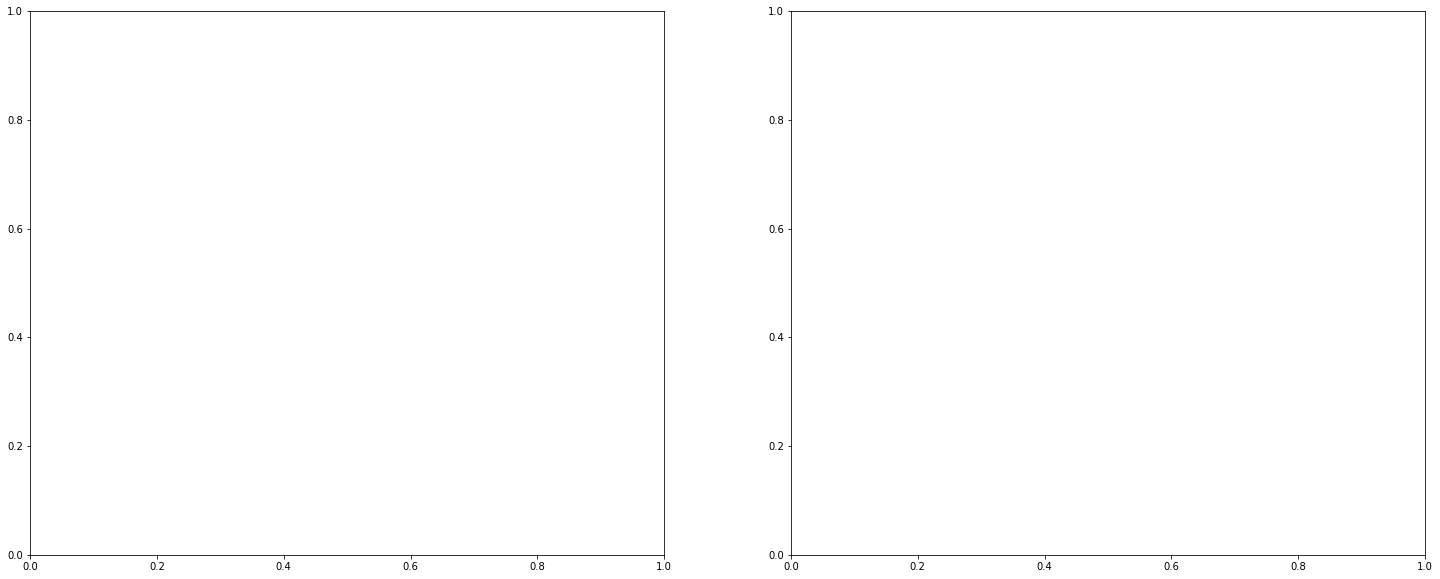

In [257]:
# plotting the roc and before and after values of the FPR and TPR
import matplotlib.pyplot as plt
af=28
cau=21
fig,ax=plt.subplots(1,2,figsize=(25,10))
ax[0].plot(roc_aa[:,1],roc_aa[:,2],'-o',label="African-American")
ax[0].plot(roc_ca[:,1],roc_ca[:,2],'-o',label="Caucasian")
ax[0].plot(roc_aa[af,1],roc_aa[af,2],'X',label="African american Threshhold")
ax[0].plot(roc_ca[cau][1],roc_ca[cau,2],'X',label="Caucasian Threshhold")
ax[0].text(roc_aa[af][1]-0.05,roc_aa[af,2],"{:.2f}".format(roc_aa[af][0]),fontsize=12)
ax[0].text(roc_ca[cau][1]+0.02,roc_ca[cau,2],"{:.2f}".format(roc_ca[cau][0]),fontsize=12)
ax[0].legend()
ax[0].set_ylabel("True possitive rate",fontsize=18)
ax[0].set_xlabel("False positive rate",fontsize=18)
ax[0].set_title("ROC Curves for model predictions of different races",fontsize=20)
ax[0].grid()

#gather previous data in a list
prev=[ CM_cau[1][1],CM_cau[0][1],CM_af[1][1],CM_af[0][1] ] #TP,fp,TP,fp
post=[ roc_ca[cau][1:], roc_aa[af][1:]]

ax[1].scatter([0,0],prev[0:2],color='tab:blue')
ax[1].scatter([0,0],prev[2:],color='tab:orange')
ax[1].scatter([1,1],post[0],color='tab:blue')
ax[1].scatter([1,1],post[1],color='tab:orange')
ax[1].set_xticks([0,1])
ax[1].set_xticklabels(["Before adjusting","After adjusting"],fontsize=14)
ax[1].axvline(x=0,color='grey',alpha=0.5)
ax[1].axvline(x=1,color='grey',alpha=0.5)

ax[1].plot([0,1],[prev[0],post[0][1]],'-',color="tab:blue",label="TPR - African-American")
ax[1].text(0-0.06,prev[0],"{:.2f}".format(prev[0]),fontsize=12)
ax[1].text(1+0.02,post[0][1],"{:.2f}".format(post[0][1]),fontsize=12)

ax[1].plot([0,1],[prev[1],post[0][0]],'--',color="tab:blue",label="FPR - African-American")
ax[1].text(0-0.06,prev[1],"{:.2f}".format(prev[1]),fontsize=12)
ax[1].text(1+0.02,post[0][0],"{:.2f}".format(post[0][0]),fontsize=12)

ax[1].plot([0,1],[prev[2],post[1][1]],'-',color="tab:orange",label="TPR - Caucasian")
ax[1].text(0-0.06,prev[2],"{:.2f}".format(prev[2]),fontsize=12)
ax[1].text(1+0.02,post[1][1],"{:.2f}".format(post[1][1]),fontsize=12)

ax[1].plot([0,1],[prev[3],post[1][0]],'--',color="tab:orange",label="FPR - Caucasian")
ax[1].text(0-0.06,prev[3],"{:.2f}".format(prev[3]),fontsize=12)
ax[1].text(1+0.02,post[1][0]-0.01,"{:.2f}".format(post[1][0]),fontsize=12)
ax[1].legend(loc='center left', bbox_to_anchor=(1.07, 0.35), prop={'size': 14})
ax[1].set_xlim(-0.1,1.1)
